In [1]:
import os
import json

from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
with open('train.json') as file:
    json_file = json.load(file)
    
json_file

[{'nums': [{'box': [[180, 889], [596, 951], [598, 1056], [185, 983]],
    'text': 'B060BB125'}],
  'file': 'train/0.jpg'},
 {'nums': [{'box': [[794, 661], [1004, 618], [1009, 670], [799, 717]],
    'text': 'M938OX116'},
   {'box': [[944, 268], [995, 267], [994, 283], [942, 283]],
    'text': 'H881OA116'}],
  'file': 'train/1.jpg'},
 {'nums': [{'box': [[286, 603], [346, 606], [346, 621], [285, 616]],
    'text': 'A549XA163'}],
  'file': 'train/2.jpg'},
 {'nums': [{'box': [[217, 486], [489, 487], [488, 580], [204, 570]],
    'text': 'O934MO190'}],
  'file': 'train/3.jpg'},
 {'nums': [{'box': [[115, 184], [202, 168], [204, 189], [119, 207]],
    'text': 'T647TO35'}],
  'file': 'train/4.bmp'},
 {'nums': [{'box': [[153, 318], [262, 339], [264, 371], [155, 348]],
    'text': 'A750PY35'}],
  'file': 'train/5.bmp'},
 {'nums': [{'box': [[340, 1138], [687, 1176], [703, 1279], [352, 1229]],
    'text': 'C154TY98'}],
  'file': 'train/6.jpg'},
 {'nums': [{'box': [[257, 269], [439, 267], [440, 307],

### Example

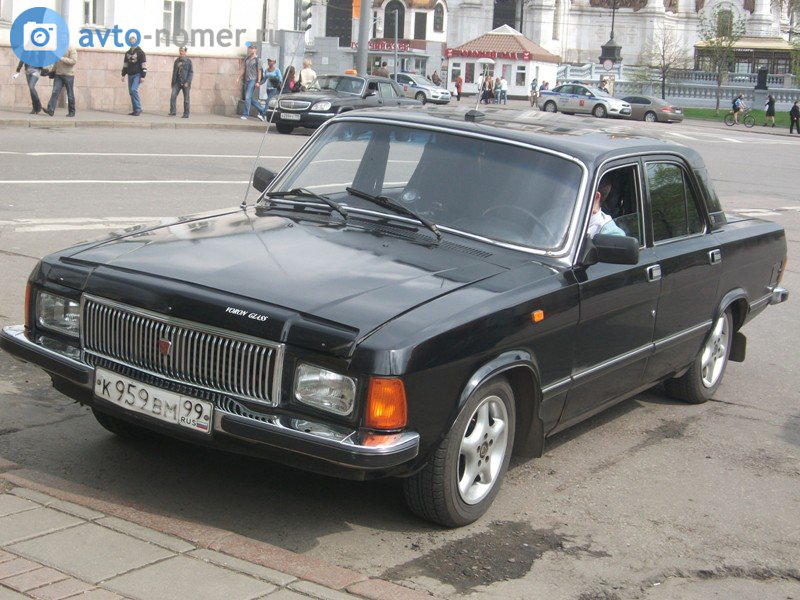

In [36]:
img_ex = Image.open('./data/train/10.jpg')
img_ex

In [29]:
bb_ex = [[97, 368], [214, 405], [209, 434], [95, 396]]
x_1 = bb_ex[0][0]
y_1 = bb_ex[0][1]
x_2 = bb_ex[1][0]
y_2 = bb_ex[1][1]
x_3 = bb_ex[2][0]
y_3 = bb_ex[2][1]
x_4 = bb_ex[3][0]
y_4 = bb_ex[3][1]

In [30]:
im = img_ex
draw = ImageDraw.Draw(im) 
draw.line((x_1, y_1, x_2, y_2), fill=128, width=4)
draw.line((x_2, y_2, x_3, y_3), fill=128, width=4)
draw.line((x_3, y_3, x_4, y_4), fill=128, width=4)
draw.line((x_4, y_4, x_1, y_1), fill=128, width=4)
im.show()

In [39]:
def find_minmax(bb: list) -> list:
    min_x, max_x = bb_ex[0][0], bb_ex[0][0]
    min_y, max_y = bb_ex[0][1], bb_ex[0][1]
    
    for x, y in bb[1:]:
        if x > max_x:
            max_x = x
        elif x < min_x:
            min_x = x
        
        if y > max_y:
            max_y = y
        elif y < min_y:
            min_y = y
    
    return min_x, min_y, max_x, max_y

In [40]:
xy_minmax = find_minmax(bb_ex)
xy_minmax

(95, 368, 214, 434)

In [38]:
im = img_ex
draw = ImageDraw.Draw(im) 
draw.line((xy_minmax[0], xy_minmax[1], xy_minmax[2], xy_minmax[1]), fill=128, width=4)
draw.line((xy_minmax[2], xy_minmax[1], xy_minmax[2], xy_minmax[3]), fill=128, width=4)
draw.line((xy_minmax[2], xy_minmax[3], xy_minmax[0], xy_minmax[3]), fill=128, width=4)
draw.line((xy_minmax[0], xy_minmax[3], xy_minmax[0], xy_minmax[1]), fill=128, width=4)
im.show()

### main

In [6]:
def find_minmax(bb: list) -> list:
    min_x, max_x = bb[0][0], bb[0][0]
    min_y, max_y = bb[0][1], bb[0][1]
    
    for x, y in bb[1:]:
        if x > max_x:
            max_x = x
        elif x < min_x:
            min_x = x
        
        if y > max_y:
            max_y = y
        elif y < min_y:
            min_y = y
    
    return min_x, min_y, max_x, max_y


def convert_to_yolov5(bboxs, file_name):

    im = Image.open(os.path.join('./data', file_name))
    image_w, image_h = im.size
    
    data = []
    for bb in bboxs:
        min_x, min_y, max_x, max_y = find_minmax(bb['box'])
        
        # get center, width, height
        b_center_x = (min_x + max_x) / 2 
        b_center_y = (min_y + max_y) / 2
        b_width    = (max_x - min_x)
        b_height   = (max_y - min_y)

        # normalize center, width, height
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 

        data.append("{} {:.3f} {:.3f} {:.3f} {:.3f}\n".format(0, b_center_x, b_center_y, b_width, b_height))
         
    save_file_name = os.path.join("./data/labels/annotations", f"{file_name.split('/')[-1].split('.')[0]}.txt")
    
    with open(save_file_name, mode='w') as f:
        f.writelines(data)

In [8]:
for image_annot in tqdm(json_file):
    convert_to_yolov5(image_annot['nums'], image_annot['file'])

In [26]:
files_img = os.listdir('./data/train/')
len(files_img) 

25632

In [27]:
train_path, val_path = train_test_split(files_img, test_size=0.15, random_state=17)
val_path, test_path = train_test_split(val_path, test_size=0.5, random_state=17)

In [28]:
len(train_path), len(val_path), len(test_path)

(21787, 1922, 1923)

In [30]:
import shutil 

In [38]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in tqdm(list_of_files):
        try:
            shutil.move(f, destination_folder)
        except:
            print(f, destination_folder.split('/')[-1])

In [32]:
train_path_curr = [f'./data/train/{path}' for path in train_path]
val_path_curr = [f'./data/train/{path}' for path in val_path]
test_path_curr = [f'./data/train/{path}' for path in test_path]

In [37]:
len(os.listdir('./data/train'))

25632

In [39]:
move_files_to_folder(train_path_curr, './data/images/train')
move_files_to_folder(val_path_curr, './data/images/val/')
move_files_to_folder(test_path_curr, './data/images/test/')

100%|█████████████████████████████████████████████████████████████████████████████| 1923/1923 [00:03<00:00, 503.78it/s]


In [40]:
len(os.listdir('./data/images/train')), len(os.listdir('./data/images/val')), len(os.listdir('./data/images/test'))

(21787, 1922, 1923)

In [48]:
train_path[:5]

['7324.jpg', '17895.bmp', '19974.jpg', '16463.bmp', '8332.bmp']

In [49]:
train_path_model = [f'./images/train/{path}\n' for path in train_path]
val_path_model = [f'./images/val/{path}\n' for path in val_path]
test_path_model = [f'./images/test/{path}\n' for path in test_path]

In [50]:
train_path_model[:5]

['./images/train/7324.jpg\n',
 './images/train/17895.bmp\n',
 './images/train/19974.jpg\n',
 './images/train/16463.bmp\n',
 './images/train/8332.bmp\n']

In [51]:
val_path_model[:5]

['./images/val/22671.jpg\n',
 './images/val/1882.jpg\n',
 './images/val/25327.jpg\n',
 './images/val/5422.bmp\n',
 './images/val/10372.bmp\n']

In [52]:
test_path_model[:5]

['./images/test/18543.jpg\n',
 './images/test/21384.bmp\n',
 './images/test/14907.jpg\n',
 './images/test/5962.jpg\n',
 './images/test/17493.jpg\n']

In [53]:
with open('./data/train.txt', mode='w') as f:
    f.writelines(train_path_model)
with open('./data/val.txt', mode='w') as f:
    f.writelines(val_path_model)
with open('./data/test.txt', mode='w') as f:
    f.writelines(test_path_model)

In [57]:
len(os.listdir("./data/labels/annotations"))

25632

In [59]:
annot_files = os.listdir("./data/labels/annotations")
annot_files[:5]

['0.txt', '1.txt', '10.txt', '100.txt', '1000.txt']

In [61]:
len(list(set(annot_files)))

25632

In [60]:
train_path 

['7324.jpg',
 '17895.bmp',
 '19974.jpg',
 '16463.bmp',
 '8332.bmp',
 '2012.jpg',
 '8731.bmp',
 '3560.jpg',
 '11157.jpg',
 '945.jpg',
 '1644.jpg',
 '24027.jpg',
 '15968.jpg',
 '9681.jpg',
 '3353.jpg',
 '20073.bmp',
 '13924.bmp',
 '18524.jpg',
 '10127.jpg',
 '2173.jpg',
 '19616.bmp',
 '24796.bmp',
 '17669.jpg',
 '9414.bmp',
 '10370.jpg',
 '16219.jpg',
 '5863.jpg',
 '23248.jpg',
 '22196.jpg',
 '15059.jpg',
 '22684.jpg',
 '2824.jpg',
 '11207.bmp',
 '15650.bmp',
 '21272.jpg',
 '15649.jpg',
 '5679.bmp',
 '11094.bmp',
 '17070.jpg',
 '14685.jpg',
 '19672.jpg',
 '25014.bmp',
 '17650.jpg',
 '19788.jpg',
 '11683.jpg',
 '24354.bmp',
 '268.bmp',
 '18028.bmp',
 '7064.jpg',
 '20230.jpg',
 '6368.jpg',
 '24497.bmp',
 '6979.jpg',
 '10081.bmp',
 '21598.jpg',
 '18125.jpg',
 '24197.bmp',
 '1128.bmp',
 '4693.bmp',
 '511.jpg',
 '19487.bmp',
 '19624.bmp',
 '5053.jpg',
 '6767.jpg',
 '18101.jpg',
 '385.jpg',
 '22596.jpg',
 '13149.jpg',
 '6245.bmp',
 '5674.jpg',
 '21321.bmp',
 '18450.jpg',
 '7397.bmp',
 '14467.j

In [64]:
annot_files = [annot[:-4] for annot in annot_files]
annot_files[:5]

['0', '1', '10', '100', '1000']

In [66]:
train_path_file = [annot[:-4] for annot in train_path]
val_path_file = [annot[:-4] for annot in val_path]
test_path_file = [annot[:-4] for annot in test_path]

In [68]:
train_annot_files = list(set(annot_files).intersection(train_path_file))
val_annot_files = list(set(annot_files).intersection(val_path_file))
test_annot_files = list(set(annot_files).intersection(test_path_file))

In [70]:
len(train_annot_files), len(train_path_file)

(21787, 21787)

In [71]:
len(val_annot_files), len(val_path_file)

(1922, 1922)

In [72]:
len(test_annot_files), len(test_path_file)

(1923, 1923)

In [75]:
train_annot_files = [f'./data/labels/annotations/{file}.txt' for file in train_annot_files]
val_annot_files = [f'./data/labels/annotations/{file}.txt' for file in val_annot_files]
test_annot_files = [f'./data/labels/annotations/{file}.txt' for file in test_annot_files]

In [79]:
move_files_to_folder(train_annot_files, './data/labels/train/')
move_files_to_folder(val_annot_files, './data/labels/val/')
move_files_to_folder(test_annot_files, './data/labels/test/')

100%|█████████████████████████████████████████████████████████████████████████████| 1923/1923 [00:03<00:00, 586.26it/s]
